In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils import data
from torch.autograd import Variable

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values - 1
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values - 1

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
X_train = Variable(torch.FloatTensor(X_train), requires_grad = False)
y_train = Variable(torch.FloatTensor(y_train), requires_grad = False)
X_test = Variable(torch.FloatTensor(X_test), requires_grad = False)
y_test = Variable(torch.FloatTensor(y_test), requires_grad = False)

In [6]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = torch.nn.Linear(9, 2)
        self.output = torch.nn.Linear(2, 2)
        
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [7]:
model = Network()

In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.0005)
epochs = 600

In [9]:
all_losses = []

for e in range(epochs):        
    def closure():
        outputs = model(X_train)
        loss = criterion(outputs, y_train.long())
        all_losses.append(loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    
    optimizer.step(closure=closure)

C:\Users\Inventario-LSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [10]:
all_losses = np.array(all_losses, dtype = np.float)

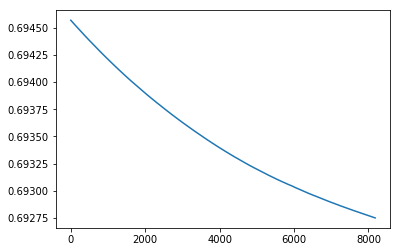

In [11]:
plt.plot(all_losses)
plt.show()

In [12]:
predicted_values = []

model.eval()
for num in range(len(X_test)):
    predicted_values.append(model(X_test[num]).data.numpy())

C:\Users\Inventario-LSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [13]:
score = 0

for num in range(len(predicted_values)):
    if np.argmax(y_test[num].data.numpy()) == np.argmax(predicted_values[num]):
        score += 1
        
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 0.0
